# Hydrogen atom

## 1. Plot the radial wavefunction for 1s, 2s, 2p, 3s, 3p and 3d hydrogen atomic orbitals.

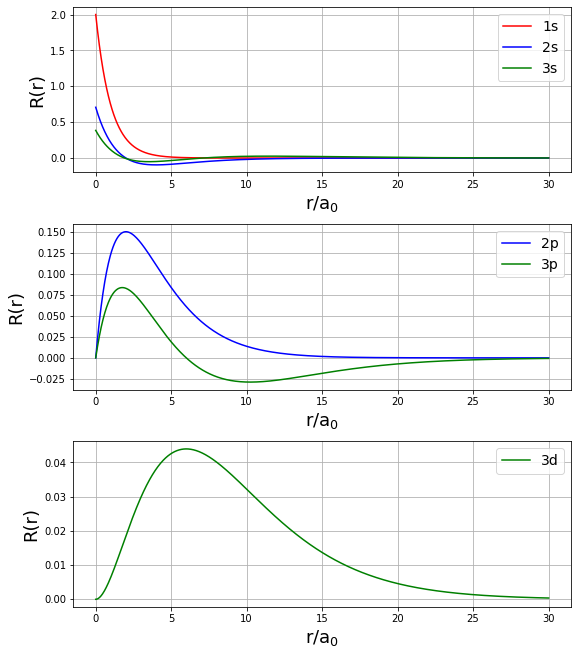

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sympy.abc import n, l, r, Z
from sympy.physics import hydrogen
from sympy.utilities.lambdify import lambdify

R_nl_1s = lambdify(r, hydrogen.R_nl(1, 0, r, 1))
R_nl_2s = lambdify(r, hydrogen.R_nl(2, 0, r, 1))
R_nl_3s = lambdify(r, hydrogen.R_nl(3, 0, r, 1))
R_nl_2p = lambdify(r, hydrogen.R_nl(2, 1, r, 1))
R_nl_3p = lambdify(r, hydrogen.R_nl(3, 1, r, 1))
R_nl_3d = lambdify(r, hydrogen.R_nl(3, 2, r, 1))
r = np.linspace(0, 30, 1000)

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(3,2,1)

#plot 1s, 2s and 3s radial wavefunctions
ax.plot(r, R_nl_1s(r), 'r', label='1s')
ax.plot(r, R_nl_2s(r), 'b', label='2s')
ax.plot(r, R_nl_3s(r), 'g', label='3s')
plt.xlabel("r/a$_{0}$", fontsize=18)
plt.ylabel("R(r)", fontsize=18)
plt.grid()
leg = ax.legend(fontsize=14)

#plot 2p and 3p radial wavefunctions
ax1 = fig.add_subplot(3,2,3)
ax1.plot(r, R_nl_2p(r), 'b', label='2p')
ax1.plot(r, R_nl_3p(r), 'g', label='3p')
plt.xlabel("r/a$_{0}$", fontsize=18)
plt.ylabel("R(r)", fontsize=18)
plt.grid()
leg = ax1.legend(fontsize=14)

#plot 3d radial wavefunctions
ax2 = fig.add_subplot(3,2,5)
ax2.plot(r, R_nl_3d(r), 'g', label='3d')
plt.xlabel("r/a$_{0}$", fontsize=18)
plt.ylabel("R(r)", fontsize=18)
plt.grid()
leg = ax2.legend(fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## 2. Plot the probability density for 1s, 2s, 3s hydrogen atomic orbitals.

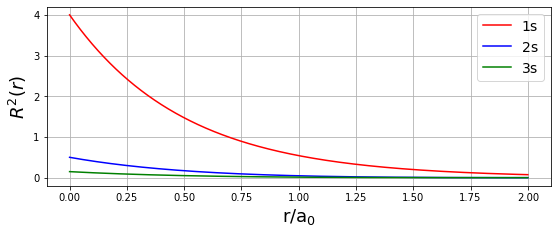

In [3]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(3,2,1)
r = np.linspace(0, 2, 1000)
#plot 1s, 2s and 3s radial wavefunctions
ax.plot(r, np.square(R_nl_1s(r)), 'r', label='1s')
ax.plot(r, np.square(R_nl_2s(r)), 'b', label='2s')
ax.plot(r, np.square(R_nl_3s(r)), 'g', label='3s')
plt.xlabel("r/a$_{0}$", fontsize=18)
plt.ylabel("$R^{2}(r)$", fontsize=18)
plt.grid()
leg = ax.legend(fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## 3. Plot the radial distribution function for 1s, 2s, 3s, 2p and 3p hydrogen atomic orbitals. Find out the position where there is maximum probability of finding an electron in each of these orbitals. Also denote the number of nodes for each of the orbitals.

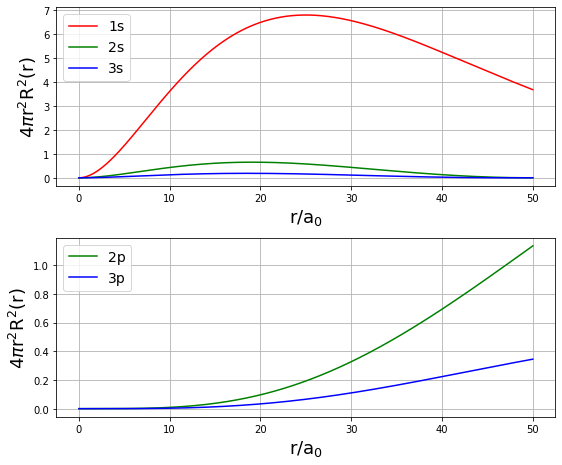

In [4]:
#Compute radial distribution 
D_1s = 4*np.pi*(r**2)*np.square(R_nl_1s(r))
D_2s = 4*np.pi*(r**2)*np.square(R_nl_2s(r))
D_3s = 4*np.pi*(r**2)*np.square(R_nl_3s(r))
D_2p = 4*np.pi*(r**2)*np.square(R_nl_2p(r))
D_3p = 4*np.pi*(r**2)*np.square(R_nl_3p(r))
r = np.linspace(0, 50, 1000)

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(3,2,1)

#plot 1s, 2s and 3s radial distribution
ax.plot(r, D_1s, 'r', label='1s')
ax.plot(r, D_2s, 'g', label='2s')
ax.plot(r, D_3s, 'b', label='3s')
plt.xlabel("r/a$_{0}$", fontsize=18)
plt.ylabel("4$\pi$r$^{2}$R$^{2}$(r)", fontsize=18)
plt.grid()
leg = ax.legend(fontsize=14)

#plot 2p and 3p radial distribution
#r = np.linspace(0, 30, 1000)
ax1 = fig.add_subplot(3,2,3)
ax1.plot(r, D_2p, 'g', label='2p')
ax1.plot(r, D_3p, 'b', label='3p')
plt.xlabel("r/a$_{0}$", fontsize=18)
plt.ylabel("4$\pi$r$^{2}$R$^{2}$(r)", fontsize=18)
plt.grid()
leg = ax1.legend(fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## 4. Show contour plots of probability densities of 1s and 3s orbitals.

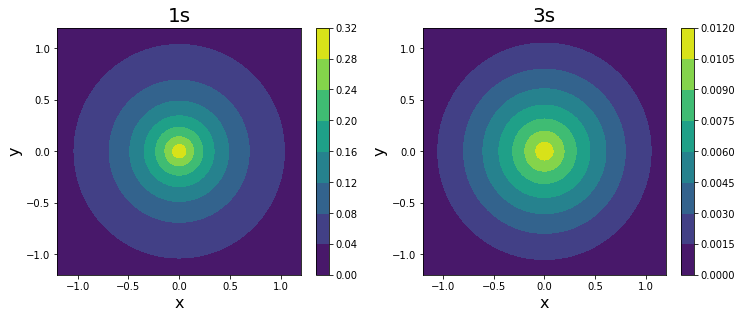

In [5]:
def prob_1s(x,y):
    r=np.sqrt(np.square(x)+np.square(y))
    return np.square(np.exp(-r)/np.sqrt(np.pi))

def prob_3s(x,y):
    r=np.sqrt(np.square(x)+np.square(y))
    return np.square((27-(18*r)+(2*r**2)*np.exp(-r/3))/(81*np.sqrt(3*np.pi)))


#Random coordinates
x = np.linspace(-1.2, 1.2, 800)
y = np.linspace(-1.2, 1.2, 800)

X, Y = np.meshgrid(x, y)
Z = prob_1s(X, Y)
Z1 = prob_3s(X, Y)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(2,2,1)

#fig, ax = plt.subplots()
cs = ax.contourf(X, Y, Z)
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.title("1s", fontsize=20)
cbar = fig.colorbar(cs)

ax1 = fig.add_subplot(2,2,2)
cs = ax1.contourf(X, Y, Z1)
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.title("3s", fontsize=20)
cbar = fig.colorbar(cs)

plt.show()

## 5. Show contour plots of probability densities of 2p$_x$ and 3p$_y$ orbitals.

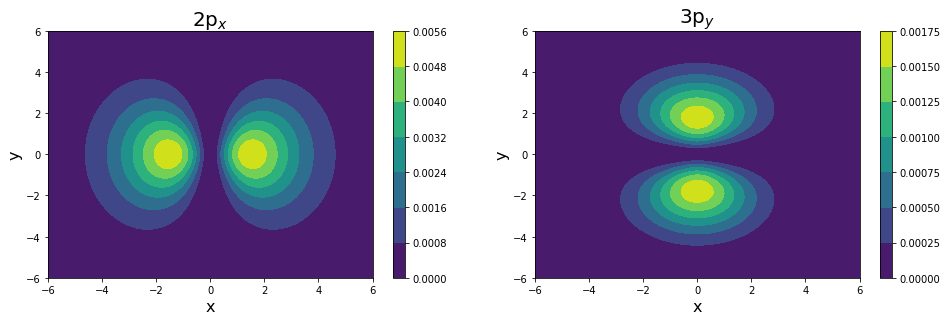

In [6]:
def prob_2px(x,y):
    r=np.sqrt(np.square(x)+np.square(y))
    return np.square(x*np.exp(-r/2)/(4*np.sqrt(2*np.pi)))

def prob_3py(x,y):
    r=np.sqrt(np.square(x)+np.square(y))
    return np.square((np.sqrt(2)*(6-r)*y*np.exp(-r/3))/(81*np.sqrt(np.pi)))


#Random coordinates
x = np.linspace(-8, 8, 800)
y = np.linspace(-6, 6, 800)

X, Y = np.meshgrid(x, y)
Z = prob_2px(X, Y)

x = np.linspace(-6, 6, 800)
y = np.linspace(-6, 6, 800)
X, Y = np.meshgrid(x, y)
Z1 = prob_3py(X, Y)

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(2,2,1)

#fig, ax = plt.subplots()
cs = ax.contourf(X, Y, Z)
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.title("2p$_x$", fontsize=20)
cbar = fig.colorbar(cs)

ax1 = fig.add_subplot(2,2,2)
cs = ax1.contourf(X, Y, Z1)
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.title("3p$_y$", fontsize=20)
cbar = fig.colorbar(cs)

plt.show()

## 6. Show contour plots of probability densities of 3d$_{z^{2}}$ and 3d$_{xy}$ orbitals.

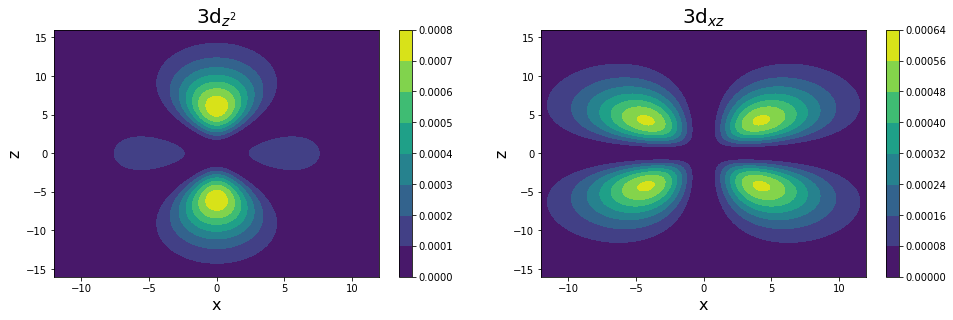

In [7]:
def prob_3dz2(x,z):
    r=np.sqrt(np.square(x)+np.square(z))
    return np.square((2*(z**2)-(x**2))*np.exp(-r/3)/(81*np.sqrt(6*np.pi)))

def prob_3dxz(x,z):
    r=np.sqrt(np.square(x)+np.square(z))
    return np.square((np.sqrt(2))*x*z*np.exp(-r/3)/(81*np.sqrt(np.pi)))



#Random coordinates
x = np.linspace(-16, 16, 800)
z = np.linspace(-16, 16, 800)

X, Z = np.meshgrid(x, z)
Y = prob_3dz2(X, Z)


x = np.linspace(-12, 12, 800)
y = np.linspace(-12, 12, 800)
X, Z = np.meshgrid(x, z)
YY = prob_3dxz(X,Z)


fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(2,2,1)

cs = ax.contourf(X, Z, Y)
plt.xlabel("x", fontsize=16)
plt.ylabel("z", fontsize=16)
plt.title("3d$_{z^{2}}$", fontsize=20)
cbar = fig.colorbar(cs)

ax1 = fig.add_subplot(2,2,2)
cs = ax1.contourf(X, Z, YY)
plt.xlabel("x", fontsize=16)
plt.ylabel("z", fontsize=16)
plt.title("3d$_{xz}$", fontsize=20)
cbar = fig.colorbar(cs)

plt.show()